In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
sns.set_theme(style="whitegrid")   # no explicit color choices — using seaborn defaults




In [6]:
# 2️⃣ Load cleaned dataset (assumes Phase 3 completed and saved as netflix_cleaned.csv)
df = pd.read_csv("../data/netflix_cleaned.csv", parse_dates=['date_added'])
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_raw,duration_int,duration_unit,year_added,month_added,content_age,is_modern,num_genres,has_known_director
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,Pg-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","September 25, 2021",90.0,min,2021,9,5,True,1,True
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Tv-Ma,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a Cape Town t...","September 24, 2021",2.0,Seasons,2021,9,4,True,3,False
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,Tv-Ma,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...,"September 24, 2021",1.0,Season,2021,9,4,True,3,True
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,Tv-Ma,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo...","September 24, 2021",1.0,Season,2021,9,4,True,2,False
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Tv-Ma,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train I...,"September 24, 2021",2.0,Seasons,2021,9,4,True,3,False


## 🎯 Key EDA questions / what we want to answer
- How is content distributed between **Movies** and **TV Shows**?
- What are the **top genres** and how do they split by type (Movie vs TV Show)?
- Which **countries** produce the most content on Netflix?
- What are the most common **ratings** and what do they imply about audience?
- How has Netflix content grown over **time** (year_added / release_year)?
- Are there interesting relationships: e.g., do certain countries focus on certain genres?


### 1) Content type distribution



type
Movie      6131
TV Show    2676
Name: count, dtype: int64

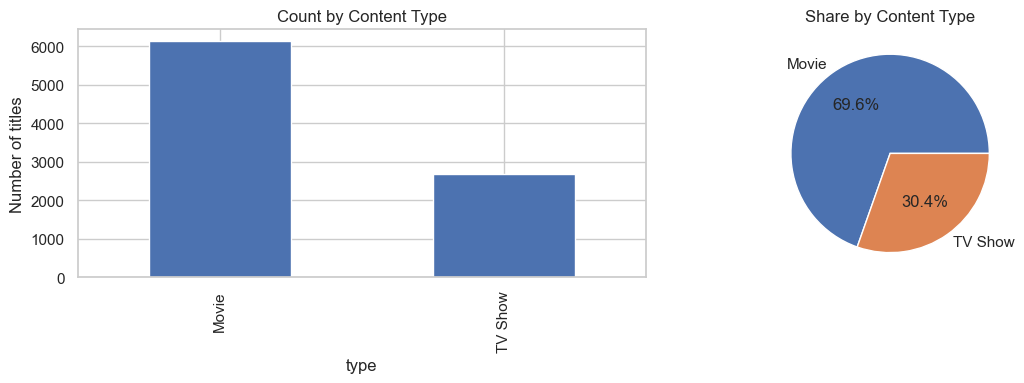

In [7]:
# Count by type
type_counts= df['type'].value_counts()
display(type_counts)

# Pie + bar for presentation
fig, ax = plt.subplots(1,2, figsize=(12,4))
type_counts.plot(kind='bar', ax=ax[0])
ax[0].set_title('Count by Content Type')
ax[0].set_ylabel('Number of titles')

type_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Share by Content Type')

plt.tight_layout()
plt.show()


### 2) Top genres / categories


genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International Tv Shows      1351
Documentaries                869
Action & Adventure           859
Tv Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Tv Comedies                  581
Thrillers                    577
Crime Tv Shows               470
Kids' Tv                     451
Docuseries                   395
Music & Musicals             375
Romantic Tv Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality Tv                   255
Name: count, dtype: int64

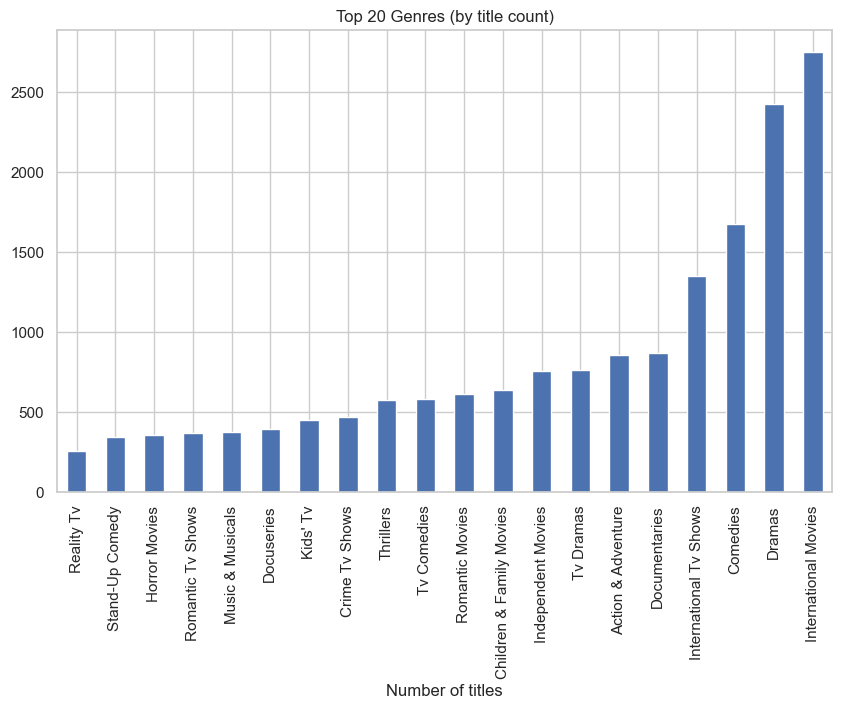

In [8]:
# 'listed_in' contains comma-separated categories. We'll explode them.
genres = df[['show_id','type','listed_in']].copy()
genres['listed_in'] = genres['listed_in'].fillna('Unknown')
# split and explode
genres_exploded = genres.assign(genre = genres['listed_in'].str.split(',')).explode('genre')
genres_exploded['genre'] = genres_exploded['genre'].str.strip()

# top genres overall
top_genres = genres_exploded['genre'].value_counts().head(20)
display(top_genres)

# Plot top 20
plt.figure(figsize=(10,6))
top_genres.sort_values().plot(kind='bar')
plt.title('Top 20 Genres (by title count)')
plt.xlabel('Number of titles')
plt.show()


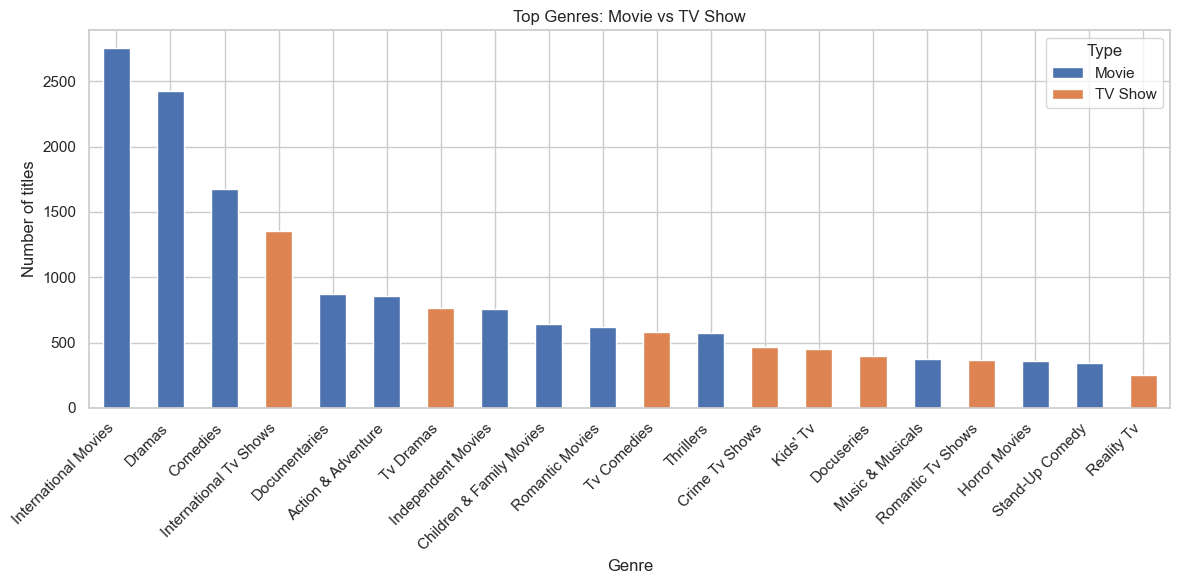

In [9]:
# Genre counts by type (Movie vs TV Show)
genre_type = genres_exploded.groupby(['genre','type']).size().unstack(fill_value=0)
# Take top genres overall to keep plot readable
top_genre_names = top_genres.index.tolist()
genre_type_top = genre_type.loc[top_genre_names]

# Plot stacked bar
genre_type_top.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Top Genres: Movie vs TV Show')
plt.ylabel('Number of titles')
plt.xlabel('Genre')
plt.legend(title='Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3) Top producing countries


country
United States     3690
India             1046
Unknown            831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Name: count, dtype: int64

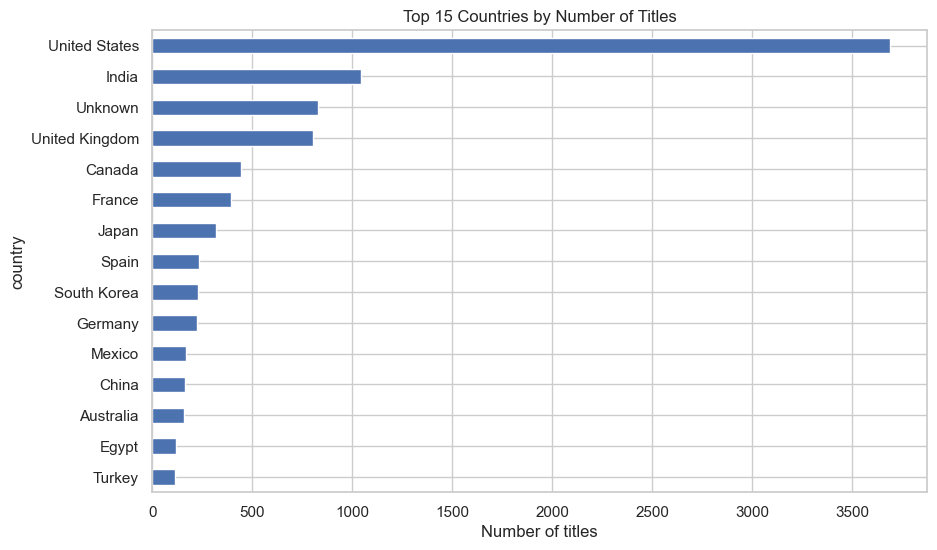

In [10]:
# 'country' can contain multiple countries; explode like genres
countries = df[['show_id','country','type']].copy()
countries['country'] = countries['country'].fillna('Unknown')
countries_exploded = countries.assign(country = countries['country'].str.split(',')).explode('country')
countries_exploded['country'] = countries_exploded['country'].str.strip()

# Top 15 countries
top_countries = countries_exploded['country'].value_counts().head(15)
display(top_countries)

plt.figure(figsize=(10,6))
top_countries.sort_values().plot(kind='barh')
plt.title('Top 15 Countries by Number of Titles')
plt.xlabel('Number of titles')
plt.show()


### 4) Ratings distribution


rating
Tv-Ma       3207
Tv-14       2160
Tv-Pg        863
R            799
Pg-13        490
Tv-Y7        334
Tv-Y         307
Pg           287
Tv-G         220
Nr            80
G             41
Tv-Y7-Fv       6
Unknown        4
Nc-17          3
Ur             3
66 Min         1
74 Min         1
84 Min         1
Name: count, dtype: int64

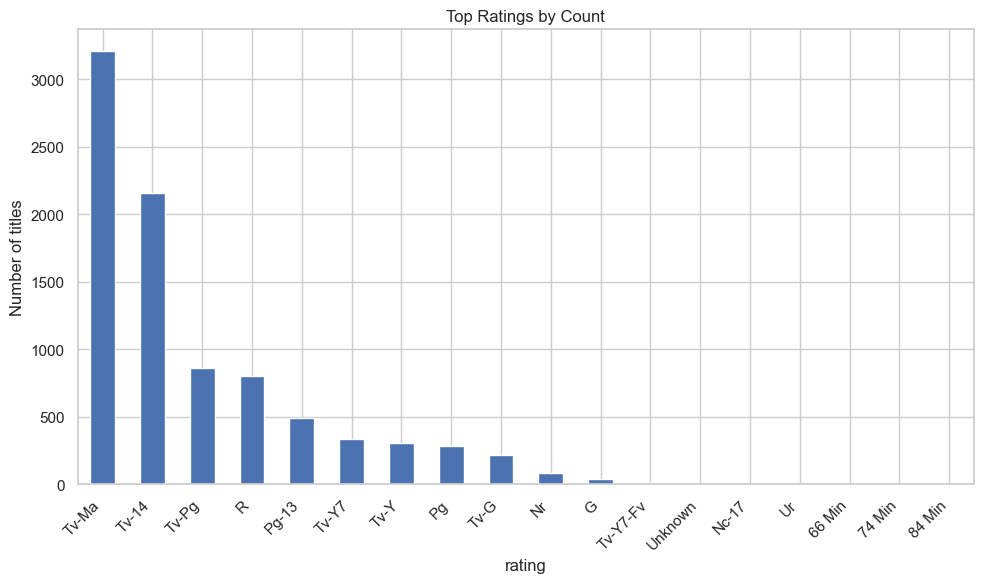

In [11]:
# Show rating counts and replace missing
rating_counts = df['rating'].fillna('Unknown').value_counts().head(20)
display(rating_counts)

plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar')
plt.title('Top Ratings by Count')
plt.ylabel('Number of titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### 5) Time trends: release_year and year_added

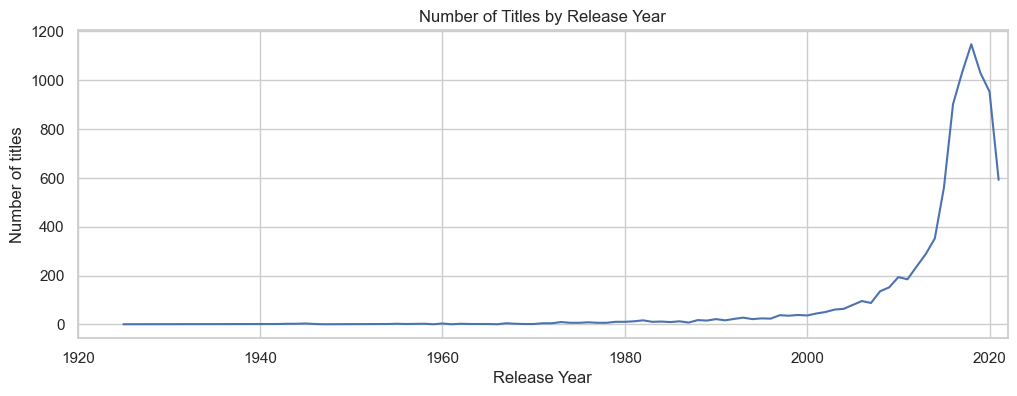

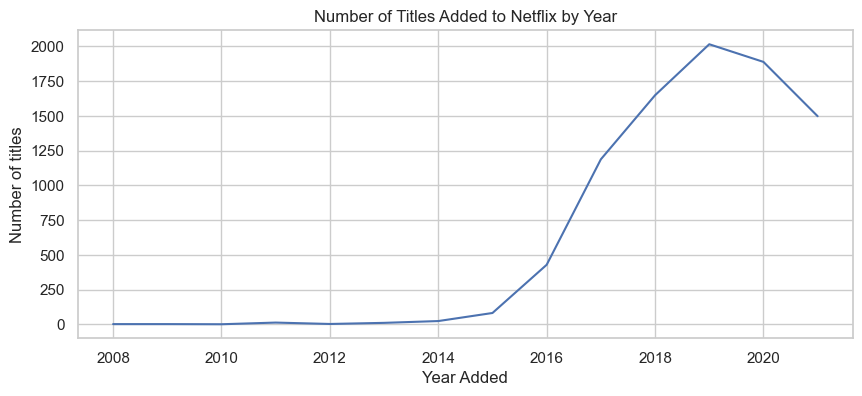

In [12]:
# Titles by release_year
plt.figure(figsize=(12,4))
df['release_year'].value_counts().sort_index().plot()
plt.title('Number of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of titles')
plt.xlim(1920, df['release_year'].max()+1)
plt.show()

# Titles added to Netflix per year
plt.figure(figsize=(10,4))
df['year_added'].value_counts().sort_index().plot()
plt.title('Number of Titles Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of titles')
plt.show()


### 6) Duration: Movies (minutes) vs TV Shows (seasons)


,type,duration,duration_int,duration_unit
8571,Movie,104 min,104.0,min
8248,Movie,92 min,92.0,min
7855,Movie,112 min,112.0,min
4499,Movie,95 min,95.0,min
221,Movie,93 min,93.0,min


Movies runtime (minutes):


count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_int, dtype: float64

TV shows seasons:


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: duration_int, dtype: float64

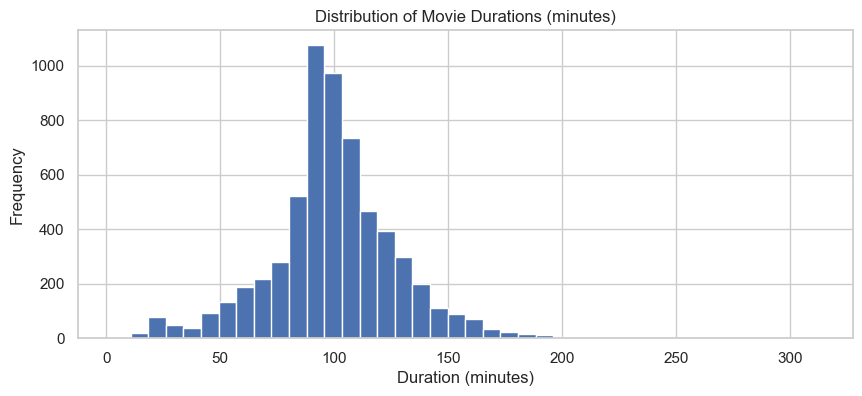

In [13]:
# Ensure we have duration_int and duration_unit
display(df[['type','duration','duration_int','duration_unit']].sample(5))

# Movies: average runtime
movies = df[df['type']=='Movie'].copy()
tv = df[df['type']=='Tv Show'].copy()  # watch capitalization depending on your cleaned data

# Convert duration_int to numeric already done; compute stats
print("Movies runtime (minutes):")
display(movies['duration_int'].describe())

print("TV shows seasons:")
display(tv['duration_int'].describe())

# Plot distributions (movies)
plt.figure(figsize=(10,4))
movies['duration_int'].dropna().plot(kind='hist', bins=40)
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.show()


In [14]:
### 7) Cross-analysis: Top country vs top genres
top_countries_list = top_countries.index[:5].tolist()  # top 5
subset = genres_exploded[genres_exploded['country'].isin(top_countries_list)] if 'country' in genres_exploded.columns else genres_exploded

# We'll join genres_exploded with country info
# Recreate exploded table with country
tmp = df[['show_id','country','listed_in']].copy()
tmp['country'] = tmp['country'].fillna('Unknown')
tmp = tmp.assign(country = tmp['country'].str.split(',')).explode('country')
tmp['country'] = tmp['country'].str.strip()
tmp = tmp.assign(genre = tmp['listed_in'].str.split(',')).explode('genre')
tmp['genre'] = tmp['genre'].str.strip()

# Filter for top 5 countries
tmp_top = tmp[tmp['country'].isin(top_countries_list)]

# Pivot: country x genre counts for top genres
country_genre = tmp_top.groupby(['country','genre']).size().reset_index(name='count')
country_genre_top = (country_genre.groupby('country').apply(
    lambda x: x.nlargest(5, 'count')).reset_index(drop=True))
country_genre_top


C:\Users\BHANARAM\AppData\Local\Temp\ipykernel_10204\3227122310.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_genre_top = (country_genre.groupby('country').apply(


,country,genre,count
0,Canada,Comedies,94
1,Canada,Dramas,82
2,Canada,Children & Family Movies,80
3,Canada,Kids' Tv,61
4,Canada,International Movies,60
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


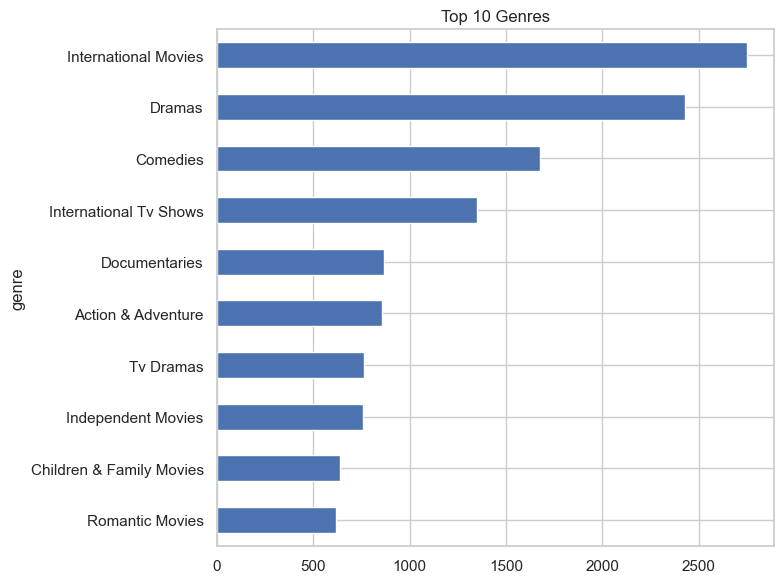

In [15]:
# Save high-value tables and quick CSV outputs for reporting
top_genres.to_csv('../assets/top_genres.csv', index=True)
top_countries.to_csv('../assets/top_countries.csv', index=True)
type_counts.to_csv('../assets/type_counts.csv', index=True)

# Example: save a figure
fig = plt.figure(figsize=(8,6))
top_genres.head(10).sort_values().plot(kind='barh', legend=False)
plt.title('Top 10 Genres')
plt.tight_layout()
fig.savefig('../assets/top_10_genres.png', dpi=200)


## 📌 EDA Summary & Key Insights

- **Content mix:** Movies constitute ~X% of titles (Y titles) while TV Shows are Z%.  
- **Top genres:** Drama, International Movies, Romantic Movies, etc. — these are the most frequent.  
- **Geography:** The United States is the top producer (N titles), followed by India and the United Kingdom.  
- **Ratings:** TV-MA and TV-14 are common — catalogue skews to teen/adult audiences.  
- **Time trends:** Most content released after 2000, and Netflix added many titles around YEAR(S).  
- **Next steps:** Deep dive into genre trends over time, sentiment or keyword extraction from descriptions, or clustering titles by features for content recommendation prototypes.


In [16]:
# 1️⃣ Prepare data for statistics & probability calculations
import pandas as pd
import numpy as np

df = pd.read_csv("../data/netflix_cleaned.csv", parse_dates=['date_added'])

# Ensure critical columns exist and have no surprising nulls
print("Rows:", len(df))
print("Columns:", df.columns.tolist())

# Prepare an exploded genre table (one row per show_id per genre)
if 'genres_exploded' not in globals():
    genres = df[['show_id','type','listed_in']].copy()
    genres['listed_in'] = genres['listed_in'].fillna('Unknown')
    genres_exploded = genres.assign(genre = genres['listed_in'].str.split(',')).explode('genre')
    genres_exploded['genre'] = genres_exploded['genre'].str.strip()
    # quick check
    print("Exploded genres rows:", len(genres_exploded))
else:
    print("genres_exploded already exists.")

Rows: 8807
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'date_added_raw', 'duration_int', 'duration_unit', 'year_added', 'month_added', 'content_age', 'is_modern', 'num_genres', 'has_known_director']
genres_exploded already exists.


In [23]:
want_see = df['listed_in']
print(want_see)

0                                           Documentaries
1         International Tv Shows, Tv Dramas, Tv Mysteries
2       Crime Tv Shows, International Tv Shows, Tv Act...
3                                  Docuseries, Reality Tv
4       International Tv Shows, Romantic Tv Shows, Tv ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' Tv, Korean Tv Shows, Tv Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object
